In [3]:
# pytorch

# install pytorch
    # https://pytorch.org/

In [2]:
# imports
import sys, os, datetime, math, time

# data
import numpy as np
import pandas as pd

# pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms, models

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pre-processing
from sklearn.model_selection import train_test_split # train test split
from sklearn.preprocessing import MinMaxScaler # scale 0 - 1
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn import metrics #accuracy measure

# images
from IPython.display import Image, display, clear_output


# to show images
def show_image(fn, width=500):
    fp1 = os.path.join('./diagrams/', fn)
    display(Image(filename=fp1, width=width))

In [258]:
# versions
print(
    f"py: {sys.version_info[0:3]}", # sys.version
    f"np: {np.__version__}",
    f"pd: {pd.__version__}",
    f"sns: {sns.__version__}",
    f"torch: {torch.__version__}",
    sep='\n'
)


py: (3, 7, 3)
np: 1.17.3
pd: 0.25.2
sns: 0.9.0
torch: 1.3.1+cpu


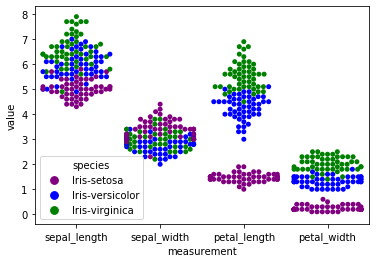

In [5]:
# df visualization (iris)

df = pd.read_csv('./data/iris.data', header=None)
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# plt histogram
# plt.hist(df['sepal_length'])

# pandas histograms
# df.hist(edgecolor='white', linewidth=1.2, figsize=(12,8))

# pandas boxplots
# df.boxplot(by='species', figsize=(12,8))

# pandas pairplot 
# pd.plotting.scatter_matrix(df, figsize=(12,10))

# sns distplot (histogram)
# sns.distplot(df['sepal_length'])

# sns kde (probability curve)
# sns.kdeplot(df['sepal_length'], shade=True)

# sns scatterplot (bivariate)
# sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'], style=df['species'])

# sns jointplot (bivariate)
# sns.jointplot(x=df['sepal_length'], y=df['sepal_width'])

# sns jointplot (bivariate) (hex)
# sns.jointplot(x=df['sepal_length'], y=df['sepal_width'], kind="hex")

# sns jointplot (bivariate) (kde)
# sns.jointplot(x=df['sepal_length'], y=df['sepal_width'], kind='kde')

# sns kde plot (bivariate) 
# sns.kdeplot(data=df['sepal_length'], data2=df['sepal_width'])

# sns kde plot (bivariate) (dark)
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(data=df['sepal_length'], data2=df['sepal_width'], cmap=cmap, n_levels=60, shade=True)

# sns violin plot
# plt.figure(figsize=(12,8));
# plt.subplot(2,2,1)
# sns.violinplot(x='species', y='sepal_length', data=df)
# plt.subplot(2,2,2)
# sns.violinplot(x='species', y='sepal_width', data=df)
# plt.subplot(2,2,3)
# sns.violinplot(x='species', y='petal_length', data=df)
# plt.subplot(2,2,4)
# sns.violinplot(x='species', y='petal_width', data=df)

# sns boxplot
# sns.boxplot(x=df['species'], y=df['sepal_width'])

# sns melted swarmplot
data = pd.melt(df, 'species', var_name='measurement')
sns.swarmplot(x='measurement', y='value', hue='species', palette=['purple','blue','green'], data=data)

# sns pairplot (compare all columns against each other)
# sns.pairplot(df, hue='species', height=3, aspect=1)


# NOT APPLICABLE HERE
# sns line plot 
# sns.lineplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'], style=df['species'])

# NOT APPLICABLE HERE
# sns catplot (NOT APPLICABLE HERE)
# sns.catplot(x=df['species'], y=df['sepal_width'], hue=df['species'], kind='bar', palette='muted')


In [179]:
# pytorch basics

# list --> tensor
tensor = torch.tensor([[1,2],[3,4]])
# numpy --> tensor
A = np.array([[23,4], [32, 51]])
# point to same object in memory
tensor = torch.from_numpy(A) # method 1 (shared memory)
tensor = torch.as_tensor(A) # method 2 (shared memory)
# new object in memory
tensor = torch.tensor(A) # infer data type (already existing data)
tensor = torch.Tensor(A) # as float (not int) # alias for 'torch.FloatTensor(A)'
# tensor --> numpy
arr1 = tensor.numpy()

# set type (precision)
tensor.type(torch.int32)

# indexing
tensor[0,0]
tensor[[0,1],0]
tensor[:,1] # index (returns 1d tensor)
tensor[:,1:] # slice (returns 2d tensor)

tensor([[ 4.],
        [51.]])

In [259]:
# generate

# placeholder
    # uinitialized data (float) # class instantiation
torch.Tensor(2,2)
torch.Tensor(size=(2,2))
# placeholder
    # uninitialized data (of specified type)
torch.empty(2,2)

# zeros
torch.zeros(2,2)
# ones
torch.ones(2,2)

# arange
torch.arange(0, 24, 2).reshape(4,3)
# linspace
torch.linspace(0, 10, 9).reshape(3,3)

# rand (uniform distribution) ( 0 >= x > 1 )
torch.rand(2,4)
# randn (standard normal distribution) (mean 0 and variance 1)
torch.randn(2,4)
# randint
torch.randint(low=0, high=10, size=(2,4))
# randperm (random permutation of integers) (shuffle n values (0 to n-1))
torch.randperm(n=11)

tensor([ 9,  6,  7,  4, 10,  1,  2,  3,  0,  5,  8])

In [ ]:
#
#
# IMPORTANT
# "_" signifies in-place (mutation)
# similar to ruby '!' (dangerous)
#
#

In [182]:
# methods
    # many methods will throw errors if values are type int.
    # this is why I used torch.Tensor (not torch.tensor) or type-casting
    
# types
    # cast object to type: 'torch.Tensor.type(torch.float32)'
    # frequently used types: float32, float64 (double), int32, bool

# tensor
tensor = torch.Tensor(np.arange(1,10,1).reshape(3,3))
tensor = torch.arange(1,10,1).reshape(3,3).type(torch.float32)

# element-wise operations
tensor.abs()
tensor.apply_(lambda x: x*1) # map function (in place)
tensor.sqrt()
tensor.ceil()
tensor.floor()
tensor.int() # type-cast (int)
tensor.clamp(min=0, max=5) # ReLU = clamp(min=0) 

# stats
    # dimension can be specified (dim=0)
tensor.histc(bins=4) # histogram (return 1d tensor of bin counts)
tensor.max()
tensor.min()
tensor.mean()
tensor.median()
tensor.mode()
tensor.std()
tensor.sum()
tensor.var()

# return as
tensor.clone() # return new copy of tensor
tensor.numpy() # return as numpy array
tensor.tolist() # return as python list

# modify tensor
tensor.flatten() # reshape to 1d
tensor.reshape(9,1) # returns view or copy, works on contiguous or non-contiguous
tensor.view(9,1) # like reshape, returns view, only works if contiguous in memory
tensor.view(9,-1) # infer second dimension

# repeat
tensor.repeat(2,2,2,2) # repeat along specified axes (like numpy.tile)
tensor.repeat_interleave(2,0) # repeats along specified axis (like numpy.repeat)

# linalg
# tensor.diagonal() # return diagonal elements (as 1d tensor)
# tensor.eig()
# tensor.inverse()
# tensor.svd()
# tensor.solve()
tensor.t() # transpose

tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])

In [183]:
# distributions (stats)
    # '_' signifies mutation

# tensor
tensor = torch.empty(4,4)

# bernoulli (torch.Tensor.bernoulli)
tensor.bernoulli_(p=.5)
# exponential
tensor.exponential_(lambd=1)
# geometric
tensor.geometric_(p=.5)
# log normal
tensor.log_normal_(mean=1, std=2)
# normal
tensor.log_normal_(mean=0, std=1)
# random (random int in range [arg1, arg2])
tensor.random_(2,5)
# uniform (continuous uniform distribution) (range [arg1, arg2])
tensor.uniform_(0,2)



tensor([[0.2404, 0.8544, 0.6294, 1.2128],
        [0.7518, 1.5963, 0.9212, 1.8019],
        [1.6272, 0.2624, 0.1030, 1.2812],
        [1.0932, 1.6514, 0.9444, 0.5545]])

In [256]:
# distributions
    # distribution.mean, distribution.variance, distribution.sample()
    
# docs examples (tensors as arguments)
    # sample_shape=torch.Size([4,4])
    # probs=torch.tensor([.4])
    
# bernoulli
bernoulli = torch.distributions.bernoulli.Bernoulli(probs=.4)
bernoulli.sample(sample_shape=[4,4]).type(torch.int32).tolist()

# binomial
binomial = torch.distributions.binomial.Binomial(
    total_count=10, # number of trials
    probs=.5 # probability
)
binomial.sample(sample_shape=torch.Size([4,4])).type(torch.int32).tolist()

# exponential
    # is the probability distribution of the time between events in a Poisson point process
exponential = torch.distributions.exponential.Exponential(rate=1.0)
np.round(exponential.sample(sample_shape=[4,4]).numpy(), 3)

# geometric
    # failures before seeing success
geometric = torch.distributions.geometric.Geometric(probs=.4)
geometric.sample(sample_shape=[4,4]).type(torch.int32).tolist()

# log normal
lognormal = torch.distributions.log_normal.LogNormal(
    loc=0.0, # torch.tensor([0.0]), 
    scale=1.0 # torch.tensor([1.0])
)
np.round(lognormal.sample(sample_shape=[4,4]).tolist(), 3)

# negative binomial
nbinom = torch.distributions.negative_binomial.NegativeBinomial(
    total_count=10,
    probs=.5
)
nbinom.sample(sample_shape=[4,4]).type(torch.int32)

# normal
norm = torch.distributions.normal.Normal(
    loc=0.0,
    scale=1.0
)
np.round(norm.sample(sample_shape=[4,4]).numpy(), 3)

# pareto
pareto = torch.distributions.pareto.Pareto(scale=1.0, alpha=1.0)
np.round(pareto.sample(sample_shape=[4,4]).numpy(), 3)

# poisson
    # https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459
    # model for series of discrete events, where average time between events is known, but timing is random.
poisson = torch.distributions.poisson.Poisson(rate=4)
poisson.sample(sample_shape=[4,4]).type(torch.int32)

# uniform
uniform = torch.distributions.uniform.Uniform(low=0.0, high=5.0)
np.round(uniform.sample(sample_shape=[4,4]).numpy(), 3)



array([[1.559, 4.661, 1.168, 1.738],
       [2.615, 2.188, 2.512, 0.78 ],
       [3.11 , 2.594, 1.393, 1.122],
       [2.699, 0.657, 2.671, 2.501]], dtype=float32)

In [141]:
# linalg

tensor = torch.tensor([[1,2],[3, 4]])
tensor + 2 # element-wise addition
tensor * 5 # element-wise scalar multiplication
np.square(tensor) # element-wise squares
np.sqrt(tensor) # element-wise sqrt
tensor * tensor # hadamard multiplication
tensor @ tensor # standard matrix multiplication
tensor @ tensor.t() # A @ At
tensor.t() @ tensor # At @ A
np.round(torch.tensor(np.random.randn(2,2))) # round elements
np.abs(torch.tensor(np.random.randn(2,2))) # abs elements
np.trace(tensor.t() @ tensor) # frobenius product

30

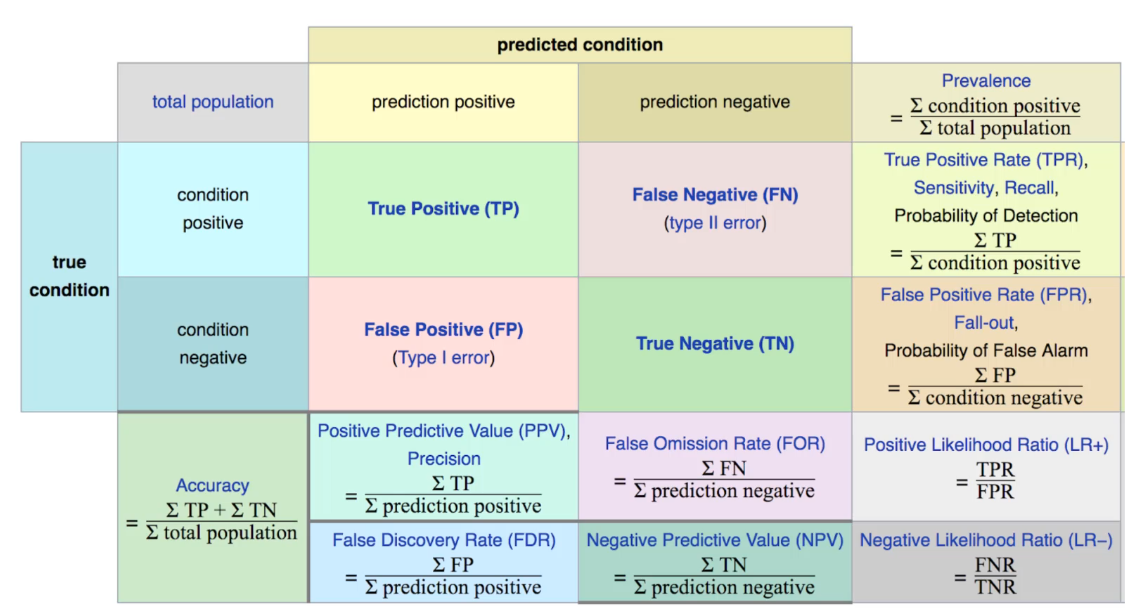

In [180]:
# scoring (binary classification)
    # accuracy
    # recall
    # precision
    # f1-score

show_image(fn='score-classification.png')

In [ ]:
# scoring (regression)
    # MAE
    # MSE
    # RMSE

In [ ]:
# unsupervised workflow
    # data acquisition
    # cleaning
    # build/train model
    # transformation (dimensinality reduction)
    # model deployment

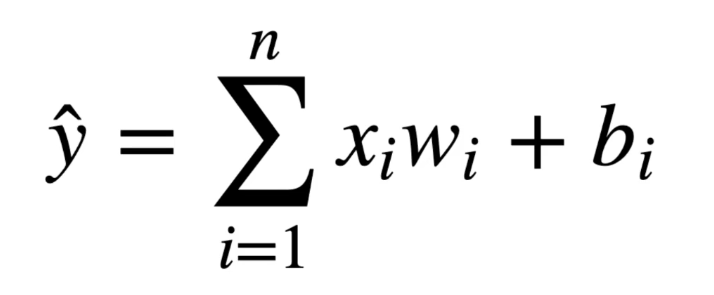

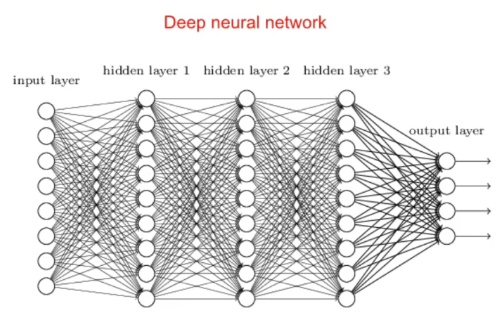

In [260]:
show_image(fn='perceptron-basics.png')
show_image(fn='simple-DNN.png')

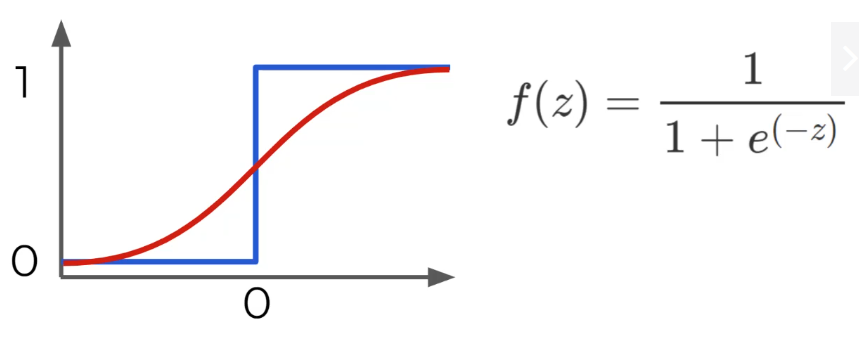

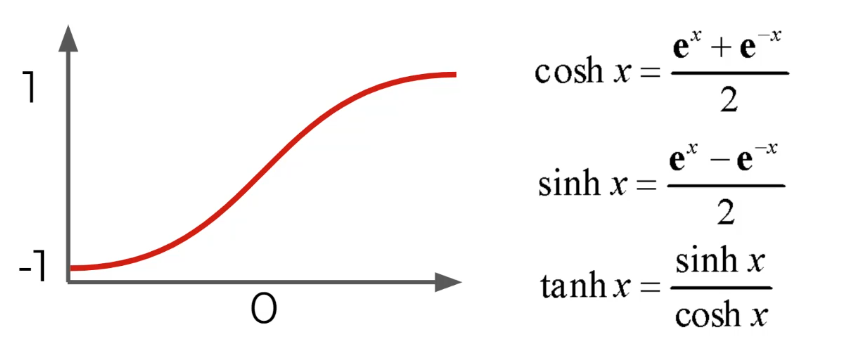

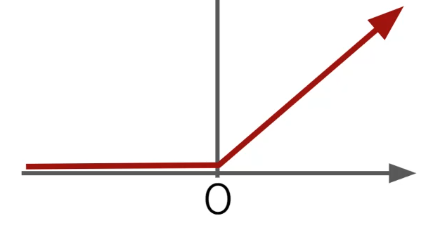

In [263]:
# activation functions (binary)

show_image(fn='sigmoid-activation.png')
show_image(fn='tanh-activation.png')
show_image(fn='relu-activation.png')

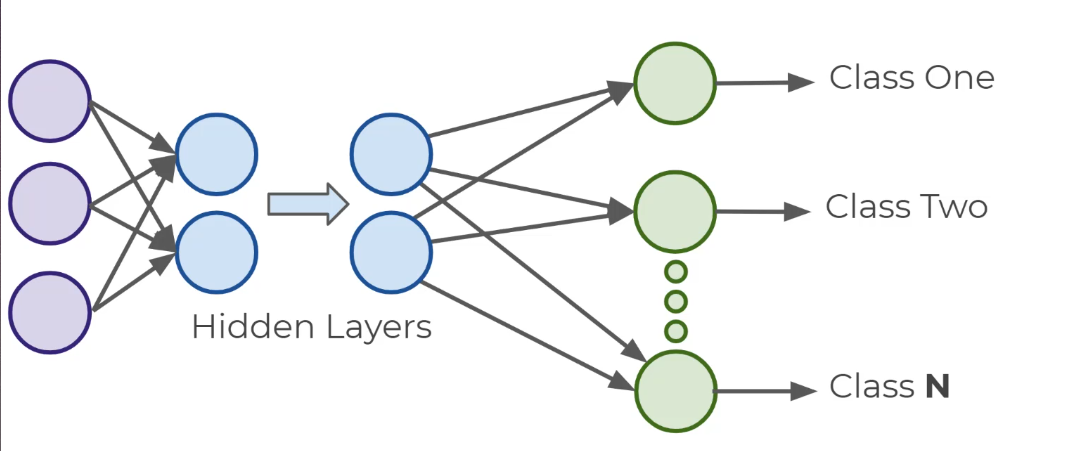

In [264]:
# activation functions (multiclass)

# multiclass will have multiple output neurons
# 2 types
    # non-exclusive -- can belong to multiple classes
    # mutually exclusive -- can only belong to one class
    
# one-hot-encoding -- dummy variables

# multiclass sigmoid
    # 1 ouput neuron per class
    # each output neuron will output a p-value between 0 and 1 (for that class)
    # for mutually exclusive:
        # use softmax function
        # probabilities for classes will sum to 1
        # highest probability determines target class chosen

    
show_image(fn='multiclass-dnn.png')

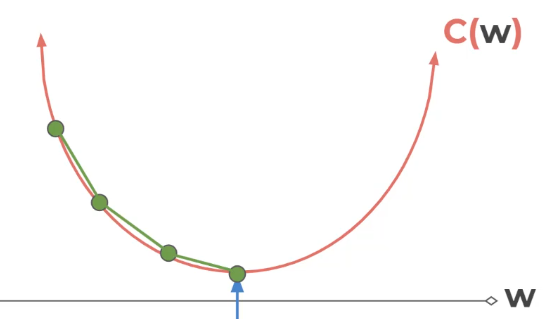

In [265]:
# cost functions, learning rate, and gradient descent

# start with larger step sizes, then reduce step sizes
# optimization algorithms (optimizers)
    # adam -- adaptive learning rate optimization algorithm. works well in convex gradient descent.
    # adagrad
    # rmsprop
    # sgdnesterov
    # adadelta

# optimizers
    # https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9
    # https://ruder.io/optimizing-gradient-descent/
    # https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

show_image(fn='learning-rate.png')


In [388]:
# multivariate linear regression
    # source -- https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817


# import csv as df
df = pd.read_csv('./data/USA_Housing.csv')

# features
X = df[[
    'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
    'Avg. Area Number of Bedrooms', 'Area Population'
]]
# target
y = df['Price']

# scale X (sklearn)
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

# train test split (sklearn)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=.2, random_state=101)

# model
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
# model params  
inputDim = 5        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 1000
# model instantiation
model = linearRegression(inputDim, outputDim)
# loss and optimizaiton
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# training
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.FloatTensor(X_train).reshape(-1, inputDim))
    labels = Variable(torch.FloatTensor(y_train.values).reshape(-1, outputDim))
    
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()
    # get output from the model, given the inputs
    outputs = model(inputs)
    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()
    # update parameters
    optimizer.step()
    
# test
with torch.no_grad(): # we don't need gradients in the testing phase
    y_pred = model(Variable(torch.Tensor(X_test))).data.numpy()

# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = np.round(y_pred.flatten())
df_results['y_test'] = np.round(y_test.to_numpy())
df_results['y_diff'] = np.abs(df_results['y_pred'] - df_results['y_test'])

# evaluate (2)
MAE = metrics.mean_absolute_error(df_results['y_test'], df_results['y_pred'])
MSE = metrics.mean_squared_error(df_results['y_test'], df_results['y_pred'])
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)

print(
    'RESULTS:',
    f"epoch: {epoch}",
    f"loss: {loss.item()}",
    '',
    df_results.head(),
    '',
    'RESULTS(MEAN)',
    df_results.mean(),
    '',
    'METRICS',
    f"MAE: {MAE}",
    f"MSE: {MSE}",
    f"RMSE: {RMSE:.2f}",
    f"Coefficient of Determination: {R2:.2f}",
    sep='\n'
)



RESULTS:
epoch: 999
loss: 10252369920.0

      y_pred     y_test   y_diff
0  1257917.0  1251689.0   6228.0
1   822112.0   873048.0  50936.0
2  1740664.0  1696978.0  43686.0
3   972450.0  1063964.0  91514.0
4   993422.0   948788.0  44634.0

RESULTS(MEAN)
y_pred    1247510.591
y_test    1245981.171
y_diff      81305.192
dtype: float64

METRICS
MAE: 81305.192
MSE: 10100188744.034
RMSE: 100499.70
Coefficient of Determination: 0.92


In [401]:
# tensordataset & dataloader

# data (iris)
df = pd.read_csv('./data/iris.data', header=None)
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = df.replace({
    'species': {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
})
# data, labels
y = df['species'].values
X = df.drop('species', axis=1).values
# scale X (sklearn)
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

# dataset
iris = TensorDataset(torch.FloatTensor(scaled_X), torch.LongTensor(y))
# loader    
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)
# enumerate
for i, batch in enumerate(iris_loader):
    print(f'batch: {i}', 'records', batch[0], 'labels', batch[1], sep='\n')


batch: 0
records
tensor([[-1.0218e+00,  1.0321e+00, -1.3981e+00, -1.1815e+00],
        [ 6.7450e-01,  3.3785e-01,  8.7649e-01,  1.4480e+00],
        [ 5.5333e-01,  8.0065e-01,  1.0471e+00,  1.5794e+00],
        [-1.0218e+00,  1.0321e+00, -1.2275e+00, -7.8708e-01],
        [ 3.1100e-01, -5.8776e-01,  5.3530e-01,  1.7530e-03],
        [-1.2642e+00, -1.2496e-01, -1.3413e+00, -1.1815e+00],
        [-1.5065e+00,  8.0065e-01, -1.3413e+00, -1.1815e+00],
        [-1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01],
        [-7.7951e-01,  2.4205e+00, -1.2844e+00, -1.4444e+00],
        [-5.3718e-01, -1.2496e-01,  4.2156e-01,  3.9617e-01],
        [-5.2506e-02, -8.1917e-01,  7.6276e-01,  9.2206e-01],
        [ 4.3217e-01, -3.5636e-01,  3.0783e-01,  1.3323e-01],
        [ 1.0380e+00, -1.2496e-01,  8.1962e-01,  1.4480e+00],
        [ 5.5333e-01, -5.8776e-01,  7.6276e-01,  3.9617e-01],
        [ 1.6438e+00,  3.3785e-01,  1.2745e+00,  7.9059e-01],
        [ 1.8983e-01, -8.1917e-01,  7.6276e-01,  5.27

In [5]:
# ANN
    # https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a
    
# ----------------
# ANN (class based)
# ----------------

class Model(torch.nn.Module):
    
    def __init__(self, input_size, h1, h2, output_size):
        super().__init__() # call parent class's init method
        # input --> hidden1 --> hidden2 --> output
        self.hidden1 = torch.nn.Linear(input_size, h1)
        self.hidden2 = torch.nn.Linear(h1, h2)
        self.output = torch.nn.Linear(h2, output_size)
        # sigmoid activation
        self.sigmoid = torch.nn.Sigmoid()
        # softmax output
        self.softmax = torch.nn.Softmax(dim=1)
            
    def forward(self, x):
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x
    
model = Model(input_size=784, h1=8, h2=8, output_size=3)
print(model)

# ----------------
# ANN (sequential)
# ----------------

input_size = 784
hidden_sizes = [128, 64]
output_size = 3

model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_sizes[0]),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[1], output_size),
    torch.nn.Softmax(dim=1)
)

print(model)



Model(
  (hidden1): Linear(in_features=784, out_features=8, bias=True)
  (hidden2): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
  (5): Softmax(dim=1)
)


In [488]:
# ANN (class-based)
    # udemy course version
    
# datasets

from torch.utils.data import TensorDataset, DataLoader

# data (iris)
df = pd.read_csv('./data/iris.data', header=None)
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = df.replace({
    'species': {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
})
# data, labels
y = df['species'].values
X = df.drop('species', axis=1).values
# scale X (sklearn)
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
# split (sklearn)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.2, random_state=101)
# tensors
    # not needed with Cross Entropy Loss
    # y_train = F.one_hot(torch.LongTensor(y_train))  
    # y_test = F.one_hot(torch.LongTensor(y_test))
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

'''
# for larger datasets (loader)

# dataset & loader (train)
iris_train = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
iris_loader_train = DataLoader(iris_train, batch_size=50, shuffle=True)
# dataset & loader (test)
iris_test = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))
iris_loader_test = DataLoader(iris_test, batch_size=50, shuffle=False)

# enumerate
for i, batch in enumerate(iris_loader):
    print(f'batch: {i}', 'records', batch[0], 'labels', batch[1], sep='\n')
'''


    
class Model(torch.nn.Module):
    
    def __init__(self, input_size, h1, h2, h3, output_size):
        super().__init__() # call parent class's init method
        self.fc1 = torch.nn.Linear(input_size, h1)
        self.fc2 = torch.nn.Linear(h1, h2)
        self.fc3 = torch.nn.Linear(h2, h3)
        self.output = torch.nn.Linear(h3, output_size)
            
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # x = F.softmax(self.output(x), dim=1)
        x = self.output(x)
        return x
    
# params
input_size = 4
output_size = 3
learning_rate = 0.01
epochs = 2000
        
# instantiate model
model = Model(input_size=input_size, h1=8, h2=8, h3=8, output_size=output_size)
print(model)

# loss & optimization
    # cross entropy loss -- combines LogSoftmax and NLLLoss
    # SGD -- `optimizer = torch.optim.SGD(model.parameters(), lr=0.01)`
    # adam -- `optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)`
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# train
for i in range(epochs):
    # training prediction
    y_pred = model.forward(X_train)
    # loss/error
    loss = criterion(y_pred, y_train)       
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# test
with torch.no_grad():
    y_pred = model.forward(X_test)
    loss = criterion(y_pred, y_test)
print(f"loss: {loss:.4f}")


# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred.argmax(dim=1).flatten()
df_results['y_test'] = y_test.flatten()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']


# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)

### df_results
torch.save(model.state_dict(), './models/iris-ANN.pt')


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)
loss: 0.1764
accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


In [492]:
# save and load models
    # uses model from previous cell

# SAVE
# save current model
torch.save(model.state_dict(), './models/iris-ANN.pt')

# LOAD
# instantiate model (using defined Model class)
new_model = Model(input_size=input_size, h1=8, h2=8, h3=8, output_size=output_size)
# load save state
new_model.load_state_dict(torch.load('./models/iris-ANN.pt'))
# print model -- like `model.eval()`
print(new_model)


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)


In [558]:
# ANN (ticket fare) (data prep)

# data
df = pd.read_csv('./data/nyc_taxi_fares.csv')
columns = [
    'pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
    'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'passenger_count'
]

# create v2

# haversine formula (distance between 2 sets of lat/long coordinates)
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    # inputs
    r = 6371  # average radius of Earth in kilometers
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    # calculate
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers
    # return
    return d

# create 'dist_km'
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
# datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# 4 hour diff (UTC, EDT)
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].map(lambda x: x.hour)
df['AMorPM'] = np.where(df['Hour']<12, 'am', 'pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.to_csv('./data/nyc_taxi_fares(2).csv')
df.head()

# create v3

df = pd.read_csv('./data/nyc_taxi_fares(2).csv', index_col=0)
am_or_pm = pd.get_dummies(df['AMorPM'])
weekday = pd.get_dummies(df['Weekday'])
df = pd.concat([df, am_or_pm , weekday], axis=1)
df = df.drop(
    ['pickup_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'EDTdate', 'AMorPM', 'Weekday', 'fare_class'],
    axis=1
)
df.to_csv('./data/nyc_taxi_fares(3).csv')
df.head()




,fare_amount,fare_class,passenger_count,dist_km,Hour,am,pm,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,6.5,0,1,2.126312,4,1,0,0,1,0,0,0,0,0
1,6.9,0,1,1.392307,11,1,0,0,0,1,0,0,0,0
2,10.1,1,2,3.326763,7,1,0,0,0,1,0,0,0,0
3,8.9,0,1,1.864129,17,0,1,0,0,0,1,0,0,0
4,19.7,1,1,7.231321,22,0,1,1,0,0,0,0,0,0


In [671]:
# ANN (ticket fare) (model)

# data
df = pd.read_csv('./data/nyc_taxi_fares(3).csv', index_col=0)
columns = [
    'fare_amount', 'passenger_count', 'dist_km', 'Hour', 
    'am','pm', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'
]
# data, labels
y = df['fare_amount'].values
X = df.drop('fare_amount', axis=1).values
# scale X (sklearn)
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
# split (sklearn)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.1, random_state=101)
# tensors
    # not needed with Cross Entropy Loss
    # y_train = F.one_hot(torch.LongTensor(y_train))  
    # y_test = F.one_hot(torch.LongTensor(y_test))
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


'''
# enumerate
for i, batch in enumerate(iris_loader):
    print(f'batch: {i}', 'records', batch[0], 'labels', batch[1], sep='\n')
'''
 
class Model(torch.nn.Module):
    
    def __init__(self, input_size, h1, h2, h3, output_size):
        super().__init__() # call parent class's init method
        self.fc1 = torch.nn.Linear(input_size, h1)
        self.fc2 = torch.nn.Linear(h1, h2)
        self.fc3 = torch.nn.Linear(h2, h3)
        self.output = torch.nn.Linear(h3, output_size)
            
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output(x)
        return x
    
# params
input_size = 13
output_size = 1
learning_rate = 0.005
epochs = 5000
batch_size = 100

# dataset & loader (train)
data_train = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
data_loader_train = DataLoader(data_train, batch_size=batch_size, shuffle=True)
# dataset & loader (test)
data_test = TensorDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
data_loader_test = DataLoader(data_test, batch_size=batch_size, shuffle=False)
        
# instantiate model
model = Model(input_size=input_size, h1=8, h2=8, h3=8, output_size=output_size)
print(model)
# loss & optimization
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
# train
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(data_loader_train))
    # training prediction
    y_pred = model.forward(batch_X).flatten()
    # loss/error
    loss = criterion(y_pred, batch_y)       
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 100 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
    
    
# test
with torch.no_grad(): # we don't need gradients in the testing phase
    y_pred = model.forward(X_test)

    
# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = np.round(y_pred.flatten(), 2)
df_results['y_test'] = np.round(y_test.flatten(), 2)
df_results['y_diff'] = np.abs(np.round(df_results['y_pred'] - df_results['y_test'], 2))

# evaluate (2)
MAE = metrics.mean_absolute_error(df_results['y_test'], df_results['y_pred'])
MSE = metrics.mean_squared_error(df_results['y_test'], df_results['y_pred'])
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)

# clear output
    # clear loss/epoch logs
time.sleep(3)
clear_output()


print(
    'RESULTS:',
    f"epochs: {epochs}",
    f"loss: {loss.item():.2f}",
    '',
    df_results.head(),
    '',
    'RESULTS(MEAN)',
    df_results.mean(),
    '',
    'METRICS',
    f"MAE: {MAE:.2f}",
    f"MSE: {MSE:.2f}",
    f"RMSE: {RMSE:.2f}",
    f"Coefficient of Determination: {R2:.2f}",
    sep='\n'
)

### df_results
torch.save(model.state_dict(), './models/nyc_ticket_fare-ANN.pt')



RESULTS:
epochs: 5000
loss: 4.32

   y_pred  y_test  y_diff
0    7.95     8.1    0.15
1   16.24    12.5    3.74
2    5.99     6.1    0.11
3   12.79    13.3    0.51
4    6.86     6.5    0.36

RESULTS(MEAN)
y_pred    10.076310
y_test     9.945377
y_diff     1.479621
dtype: float32

METRICS
MAE: 1.48
MSE: 7.29
RMSE: 2.70
Coefficient of Determination: 0.87


In [607]:
# ANN (ticket fare) (dropout)

class Model(torch.nn.Module):
    
    def __init__(self, input_size, h1, h2, h3, output_size, p1=0.5, p2=0.5):
        super().__init__() # call parent class's init method
        self.fc1 = torch.nn.Linear(input_size, h1)
        self.fc2 = torch.nn.Linear(h1, h2)
        self.fc3 = torch.nn.Linear(h2, h3)
        self.output = torch.nn.Linear(h3, output_size)
        self.dropout1 = torch.nn.Dropout(p1) # visible
        self.dropout2 = torch.nn.Dropout(p2) # hidden
            
    def forward(self, x):
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.dropout2(F.relu(self.fc3(x)))
        x = self.dropout1(self.output(x))
        return x
    
# params
input_size = 13
output_size = 1
learning_rate = 0.01
epochs = 10000
p1 = 0 # dropout p-value (visible)
p2 = .5 # dropout p-value (hidden)
        
# instantiate model
model = Model(input_size=input_size, h1=8, h2=8, h3=8, output_size=output_size, p1=p1, p2=p2)
print(model)

Model(
  (fc1): Linear(in_features=13, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (dropout1): Dropout(p=0, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
)


In [ ]:
# ann --> cnn

# efficiency
    # ann with layers 784, 120, 84, 10 and batch size 100 will have 105k parameters being adjusted
    # cnn will use much fewer parameters

"""
        
for param in model.parameters():
    print(param.numel())

"""

# effectiveness
    # flattening image loses 2D info
    # only works well on objects with very similar position/orientation

In [666]:
# ANN for image classification (multiclass)

# transform data to tensor
to_tensor = transforms.ToTensor()
# import dataset using torchvision
    # each record is tuple (image, label)
    # image.shape -- 1x28x28
# image count
    # train -- 60k
    # test -- 10k
train_data = datasets.MNIST(
    root='./data/',
    train=True,
    download=True,
    transform=to_tensor
)
test_data = datasets.MNIST(
    root='./data/',
    train=False,
    download=True,
    transform=to_tensor
)
# model
class Model(nn.Module): 
    def __init__(self, input_size, output_size, layers):
        super().__init__()
        self.fc1 = nn.Linear(input_size, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], output_size)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1) # multiclass
        return X
    
# params
input_size = 784
layers = [120, 84]
output_size = 10
epochs=5000
lr = .005
batch_size = 50
# data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
# model instantiation
model = Model(input_size, output_size, layers)
print(model)
# loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# train
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(train_loader))
    # training prediction
        # view -- resize to batch_size x flattened_image
    y_pred = model.forward(batch_X.view(batch_size,-1))
    # loss/error
        # y_pred is a 1d tensor of probabilities (length: number of classes)
        # take the argmax to get the index of the highest
    loss = criterion(y_pred, batch_y)       
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 100 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
    
# clear output
    # clear loss/epoch logs
time.sleep(3)
clear_output()

# test
y_pred_all_batches = torch.FloatTensor()
y_test_all_batches = torch.LongTensor()
with torch.no_grad():
    for b, (batch_X, batch_y) in enumerate(test_loader):
        y_pred = model.forward(batch_X.view(batch_size,-1))
        # append batch predictions
        y_pred_all_batches = torch.cat(tensors=(y_pred_all_batches, y_pred), dim=0)
        y_test_all_batches = torch.cat(tensors=(y_test_all_batches, batch_y), dim=0)
loss = criterion(y_pred, batch_y)  
print(f"loss: {loss:.4f}")

# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred_all_batches.argmax(dim=1).flatten()
df_results['y_test'] = y_test_all_batches.flatten()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']

# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)

    
torch.save(model.state_dict(), './models/mnist-image-ANN.pt') 

loss: 0.0263
accuracy: 0.9716

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


[[ 967    0    0    1    0    3    3    0    2    4]
 [   2 1124    2    0    0    0    3    0    4    0]
 [   2    0 1015    3    1    0    3    2    6    0]
 [   1    0    4  980    0   10    0    4    9    

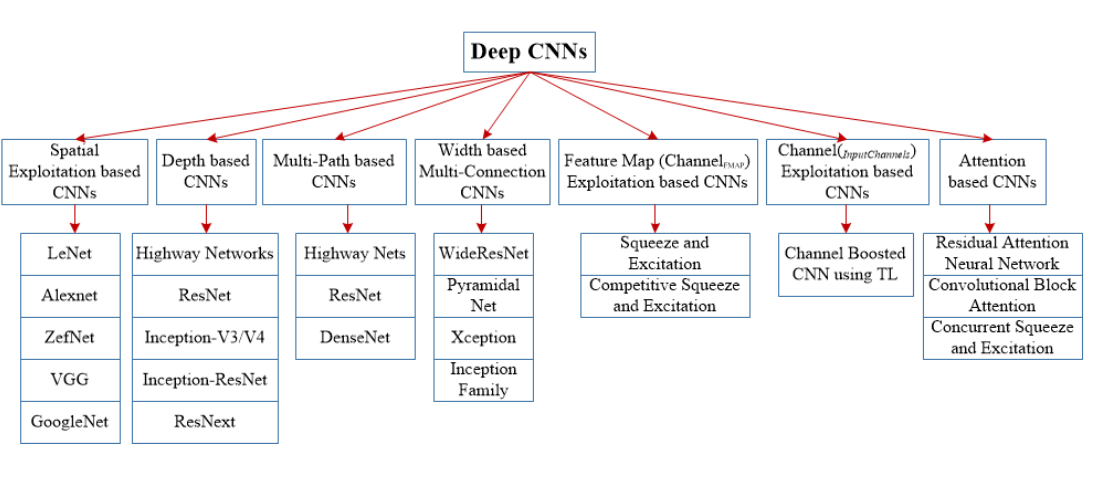

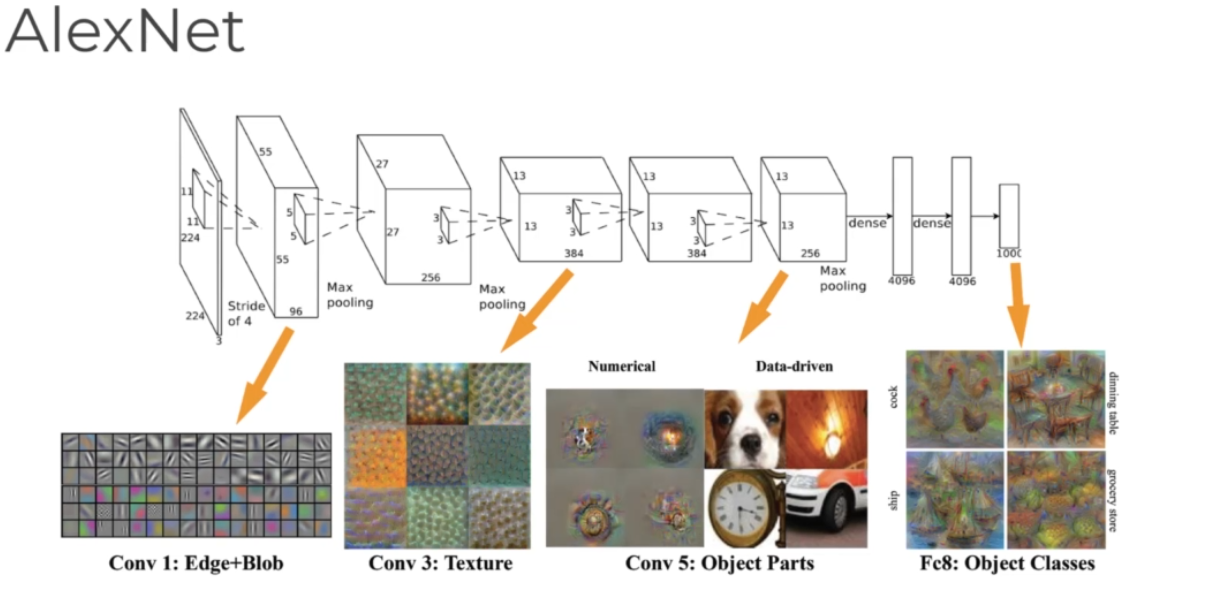

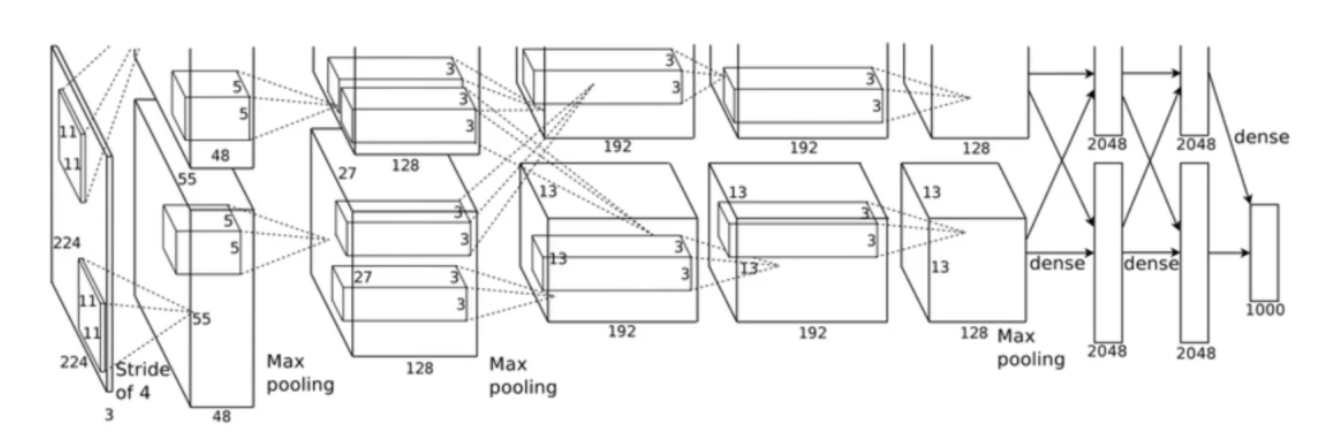

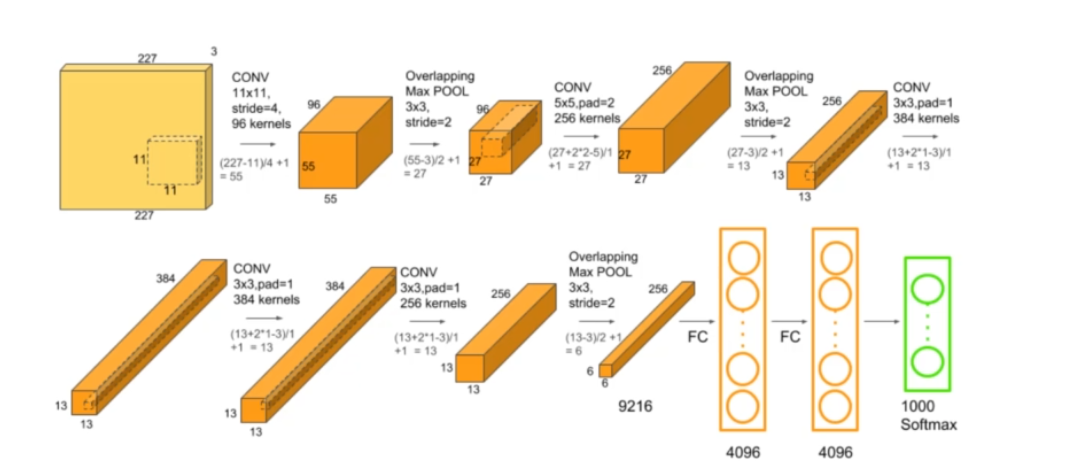

In [33]:
# CNN
    # pooling
        # reduce number of parameters (down-sampling)
        # make features more invariant to scale/orientation changes
    # not fully connected
        # local connectivity
        # 
        
# popular architectures
    # LeNet
    # AlexNet
    # VGG
    # GoogLeNet
    # Inception-V3
    # ResNet
    # DetectNet
    
# https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d

show_image(fn='cnn-architectures.png')
show_image(fn='alexnet-cnn.png')
show_image(fn='alexnet-cnn2.png')
show_image(fn='alexnet-cnn3.png')

loss: 0.5443
accuracy: 0.9052

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.95      0.87      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.84      0.92      0.88       982
           5       0.89      0.86      0.87       892
           6       0.92      0.92      0.92       958
           7       0.93      0.89      0.91      1028
           8       0.89      0.83      0.86       974
           9       0.85      0.87      0.86      1009

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000


[[ 965    0    0    2    2    5    4    1    1    0]
 [   0 1105    3    3    1    1    5    1   16    0]
 [  11    1  902   14   24    1   20   16   36    7]
 [   2    3   10  927    3   26    1   13   19    

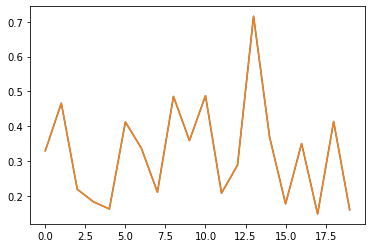

In [745]:
# CNN (mnist)

# Conv2d -- https://pytorch.org/docs/stable/nn.html#conv2d
    # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride)
    # conv1 = torch.nn.Conv2d(1,6,3,1)
    # conv2 = torch.nn.Conv2d(6,16,3,1)
# pooling
    # F.max_pool2d(x, kernel_size, stride, padding)
# nn
    # x = F.relu(conv1(x))
    # x = F.max_pool2d(x, 2, 2)
    # x = F.relu(conv2(x))
    # x = F.max_pool2d(x, 2, 2)

# transform data to tensor
to_tensor = transforms.ToTensor()
# import dataset using torchvision
    # each record is tuple (image, label)
    # image.shape -- 1x28x28
# image count
    # train -- 60k
    # test -- 10k
train_data = datasets.MNIST(
    root='./data/',
    train=True,
    download=True,
    transform=to_tensor
)
test_data = datasets.MNIST(
    root='./data/',
    train=False,
    download=True,
    transform=to_tensor
)

# model
class Model(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1,6,3,1)
        self.conv2 = torch.nn.Conv2d(6,16,3,1)
        self.fc1 = torch.nn.Linear(5*5*16, layers[0])
        self.fc2 = torch.nn.Linear(layers[0], layers[1])
        self.fc3 = torch.nn.Linear(layers[1], layers[2])
        
    def forward(self,X):
        # conv / pool layers
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        # prepare for fc layers
        X = X.view(-1, 16*5*5) # flatten
        # fc layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1)
        return X
        

# params
epochs = 2000
layers = [120,84,10] # fully connected (input / hidden / output dimensions)
batch_size = 20
lr = .001
model_fp = './models/mnist-image-CNN.pt'
# data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# use saved model or create new one
try:
    model = Model(layers=layers)
    model.load_state_dict(torch.load(model_fp))
    print('USING MODEL WITH LOADED SAVE STATE')
except Exception as e: 
    print(e)
    model = Model(layers=layers)
    print('USING NEW MODEL')
    
print(model)

# loss / optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

'''
# train
for i in range(epochs):
    for b, (batch_X, batch_y) in enumerate(train_loader):
        # predict
        y_pred = model.forward(batch_X)
        # loss
        loss = criterion(y_pred, batch_y)       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        if (b % 100 == 0):
            print(f"epoch: {i}, batch: {b}, loss: {loss.item():.2f}")
'''

# train
losses = []
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(train_loader))
    # training prediction
        # view -- resize to batch_size x flattened_image
    y_pred = model.forward(batch_X)
    # loss/error
        # y_pred is a 1d tensor of probabilities (length: number of classes)
        # take the argmax to get the index of the highest
    loss = criterion(y_pred, batch_y) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 100 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
        losses.append(loss.item())


# clear output
    # clear loss/epoch logs
time.sleep(3)
clear_output()

# training loss (plot)
sns.lineplot(x=range(len(losses)), y=losses)

# test
y_pred_all_batches = torch.FloatTensor()
y_test_all_batches = torch.LongTensor()
with torch.no_grad():
    for b, (batch_X, batch_y) in enumerate(test_loader):
        y_pred = model.forward(batch_X)
        # append batch predictions
        y_pred_all_batches = torch.cat(tensors=(y_pred_all_batches, y_pred), dim=0)
        y_test_all_batches = torch.cat(tensors=(y_test_all_batches, batch_y), dim=0)
loss = criterion(y_pred, batch_y)  
print(f"loss: {loss:.4f}")

# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred_all_batches.argmax(dim=1).flatten()
df_results['y_test'] = y_test_all_batches.flatten()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']

# loss plot
sns.lineplot(x=range(len(losses)), y=losses)

# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)
 
torch.save(model.state_dict(), model_fp) 


loss: 1.5827
accuracy: 0.6275

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1000
           1       0.75      0.73      0.74      1000
           2       0.54      0.51      0.53      1000
           3       0.45      0.44      0.45      1000
           4       0.55      0.55      0.55      1000
           5       0.51      0.51      0.51      1000
           6       0.67      0.71      0.69      1000
           7       0.66      0.68      0.67      1000
           8       0.76      0.74      0.75      1000
           9       0.70      0.68      0.69      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000


[[726  23  55  22  30  11  15  12  74  32]
 [ 36 732  23  18   8  11  12   4  43 113]
 [ 66  15 514  70 113  70  76  44  22  10]
 [ 19  18  61 444  79 184  91  55  16  33]
 [ 29   9 106  67 548  45  77  97  15

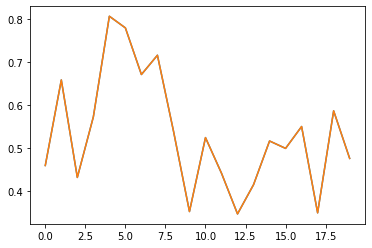

In [765]:
# CNN (cifar-10) (color images)
    # h = 32, w = 32, depth = 3
    
# transform data to tensor
to_tensor = transforms.ToTensor()

# import data (using transform)
train_data = datasets.CIFAR10(
    root='./data/',
    train=True,
    download=True,
    transform=to_tensor
)
test_data = datasets.CIFAR10(
    root='./data/',
    train=False,
    download=True,
    transform=to_tensor
)

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# model params
layers = [120,84,10] # fully connected (input / hidden / output dimensions)
conv_kernels = [5, 5]
conv_channels = [3, 6, 16]
stride = 1
padding = 1
batch_size = 50
# training params
epochs = 2000
lr = .001
# fp to save to
model_fp = './models/cifar10-CNN.pt'


# figure out fc1 input_size
    # the layers and forward here need to match the model
conv1 = torch.nn.Conv2d(conv_channels[0], conv_channels[1], conv_kernels[0], stride, padding)
conv2 = torch.nn.Conv2d(conv_channels[1], conv_channels[2], conv_kernels[1], stride, padding)
X = train_data[0][0].unsqueeze(0)
X = F.relu(conv1(X))
X = F.max_pool2d(X, 2, 2)
X = F.relu(conv2(X))
X = F.max_pool2d(X, 2, 2)

fc_input_size = np.prod(X.shape[1:])


# model
class Model(torch.nn.Module):
    def __init__(self, conv_kernels, conv_channels, layers, stride, padding, fc_input_size):
        super().__init__()
        # convolutional layers
        self.conv1 = torch.nn.Conv2d(conv_channels[0], conv_channels[1], conv_kernels[0], stride, padding)
        self.conv2 = torch.nn.Conv2d(conv_channels[1], conv_channels[2], conv_kernels[1], stride, padding)
        # fully connected
        self.fc1 = torch.nn.Linear(fc_input_size, layers[0]) # 6*6*16
        self.fc2 = torch.nn.Linear(layers[0], layers[1])
        self.fc3 = torch.nn.Linear(layers[1], layers[2])
        
    def forward(self,X):
        # conv / pool layers
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        # prepare for fc layers
        X = X.view(-1, fc_input_size) # flatten
        # fc layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1)
        return X
        

# data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# use saved model or create new one
try:
    model = Model(conv_kernels, conv_channels, layers, stride, padding, fc_input_size)
    model.load_state_dict(torch.load(model_fp))
    print('USING MODEL WITH LOADED SAVE STATE')
except Exception as e: 
    print(e)
    model = Model(conv_kernels, conv_channels, layers, stride, padding, fc_input_size)
    print('USING NEW MODEL')
    
print(model)

# loss / optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

'''
# train
for i in range(epochs):
    for b, (batch_X, batch_y) in enumerate(train_loader):
        # predict
        y_pred = model.forward(batch_X)
        # loss
        loss = criterion(y_pred, batch_y)       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        if (b % 100 == 0):
            print(f"epoch: {i}, batch: {b}, loss: {loss.item():.2f}")
'''


# train
losses = []
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(train_loader))
            
    # training prediction
    y_pred = model.forward(batch_X)
    # loss/error
        # y_pred is a 1d tensor of probabilities (length: number of classes)
        # take the argmax to get the index of the highest
    loss = criterion(y_pred, batch_y) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 100 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
        losses.append(loss.item())


# clear output
    # clear loss/epoch logs
time.sleep(2)
clear_output()

# training loss (plot)
sns.lineplot(x=range(len(losses)), y=losses)

# test
y_pred_all_batches = torch.FloatTensor()
y_test_all_batches = torch.LongTensor()
with torch.no_grad():
    for b, (batch_X, batch_y) in enumerate(test_loader):
        y_pred = model.forward(batch_X)
        # append batch predictions
        y_pred_all_batches = torch.cat(tensors=(y_pred_all_batches, y_pred), dim=0)
        y_test_all_batches = torch.cat(tensors=(y_test_all_batches, batch_y), dim=0)
loss = criterion(y_pred, batch_y)  
print(f"loss: {loss:.4f}")

# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred_all_batches.argmax(dim=1).flatten()
df_results['y_test'] = y_test_all_batches.flatten()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']

# loss plot
sns.lineplot(x=range(len(losses)), y=losses)

# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)
 
torch.save(model.state_dict(), model_fp) 



In [ ]:
# CNN useful loops

# filepaths
'''
path = './data/CATS_DOGS/'
img_fp_list = []
for directory, sub_dirs, fns in os.walk(path):
    for fn in fns:
        img_fp_list.append(os.path.join(directory, fn))
'''

# sizes of images
'''
# imports ('Image' namespace already taken)
from PIL import Image
# get sizes
img_sizes = []
rejected = []
for fp in img_fp_list:
    try:
        with Image.open(fp) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(fp)
        
print(f"images: {len(img_sizes)}")
print(f"rejected: {len(rejected)}")
'''

In [ ]:
# CNN transforms

example_transform = transforms.Compose([
    # resize
        # int -- resize shorter side, scale the other
        # sequence -- resize to dimensions (squash if aspect ratio is not preserved)
    transforms.Resize(224), 
    # crop to center 
        # int (224) --> crop to square, sequence (256, 224) --> crop to dimensions
    transforms.CenterCrop(224), 
    # flip (random probability p)
    transforms.RandomHorizontalFlip(p=.5),
    # rotate (degrees)
        # degree (30) --> rotate by -30 < x < 30
        # min/max (-30,30) --> rotate by min < x < max
    transforms.RandomRotation(30),
    # image to tensor
    transforms.ToTensor() 
    # normalize (mean, std)(per channel)
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
    # undo normalize
    transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
        std=[1/0.229, 1/0.224, 1/0.225]
    )
])

loss: 0.4603
accuracy: 0.7318181818181818

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       101
           1       0.75      0.76      0.76       119

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220


[[70 31]
 [28 91]]


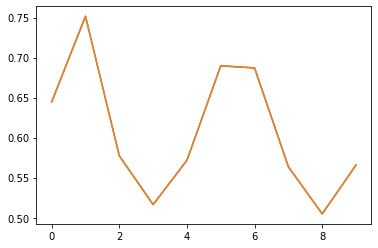

In [16]:
# CNN (cifar-10) (color images)
    # aspect-ratio, scaling, normalization, transform (to tensor)
    # augmenting -- rotate, shift, flip
    

# transforms
train_transform = transforms.Compose([
    transforms.RandomRotation(10),      
    transforms.RandomHorizontalFlip(),  
    transforms.Resize(224),             
    transforms.CenterCrop(224),         
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])
        


# model params
layers = [120,84,2] # fully connected (input / hidden / output dimensions)
conv_kernels = [5, 5]
conv_channels = [3, 6, 16]
stride = 1
padding = 1
# training params
batch_size = 20
epochs = 50
lr = .001
max_test_batches = 10
# fp to save to
model_fp = './models/cats_dogs-CNN.pt'

# data
root = './data/CATS_DOGS/'
train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)
# data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


print(
    f"class names: {train_data.classes}",
    f"train images: {len(train_data)}",
    f"test images: {len(test_data)}",
    sep='\n'    
)


# figure out fc1 input_size
    # the layers and forward here need to match the model
conv1 = torch.nn.Conv2d(conv_channels[0], conv_channels[1], conv_kernels[0], stride, padding)
conv2 = torch.nn.Conv2d(conv_channels[1], conv_channels[2], conv_kernels[1], stride, padding)
X = train_data[0][0].unsqueeze(0)
X = F.relu(conv1(X))
X = F.max_pool2d(X, 2, 2)
X = F.relu(conv2(X))
X = F.max_pool2d(X, 2, 2)

fc_input_size = np.prod(X.shape[1:])


# model
class Model(torch.nn.Module):
    def __init__(self, conv_kernels, conv_channels, layers, stride, padding, fc_input_size):
        super().__init__()
        # convolutional layers
        self.conv1 = torch.nn.Conv2d(conv_channels[0], conv_channels[1], conv_kernels[0], stride, padding)
        self.conv2 = torch.nn.Conv2d(conv_channels[1], conv_channels[2], conv_kernels[1], stride, padding)
        # fully connected
        self.fc1 = torch.nn.Linear(fc_input_size, layers[0]) 
        self.fc2 = torch.nn.Linear(layers[0], layers[1])
        self.fc3 = torch.nn.Linear(layers[1], layers[2])
        
    def forward(self,X):
        # conv / pool layers
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        # prepare for fc layers
        X = X.view(-1, fc_input_size) # flatten
        # fc layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1)
        return X

# use saved model or create new one
try:
    model = Model(conv_kernels, conv_channels, layers, stride, padding, fc_input_size)
    model.load_state_dict(torch.load(model_fp))
    print('USING MODEL WITH LOADED SAVE STATE')
except Exception as e: 
    print(e)
    model = Model(conv_kernels, conv_channels, layers, stride, padding, fc_input_size)
    print('USING NEW MODEL')
    
print(model)

# loss / optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

'''
# train
for i in range(epochs):
    for b, (batch_X, batch_y) in enumerate(train_loader):
        # predict
        y_pred = model.forward(batch_X)
        # loss
        loss = criterion(y_pred, batch_y)       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        if (b % 100 == 0):
            print(f"epoch: {i}, batch: {b}, loss: {loss.item():.2f}")
'''


# train
losses = []
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(train_loader))    
    # training prediction
    y_pred = model.forward(batch_X)
    # loss / optimization
    loss = criterion(y_pred, batch_y) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 5 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
        losses.append(loss.item())


# clear output
    # clear loss/epoch logs
time.sleep(2)
clear_output()

# training loss (plot)
sns.lineplot(x=range(len(losses)), y=losses)

# test
y_pred_all_batches = torch.FloatTensor()
y_test_all_batches = torch.LongTensor()
with torch.no_grad():
    for b, (batch_X, batch_y) in enumerate(test_loader):
        y_pred = model.forward(batch_X)
        # append batch predictions
        y_pred_all_batches = torch.cat(tensors=(y_pred_all_batches, y_pred), dim=0)
        y_test_all_batches = torch.cat(tensors=(y_test_all_batches, batch_y), dim=0)
    
        # break early 
        if b == max_test_batches: 
            break
        
loss = criterion(y_pred, batch_y)  
print(f"loss: {loss:.4f}")


# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred_all_batches.argmax(dim=1).flatten()
df_results['y_test'] = y_test_all_batches.flatten()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']

# print(df_results.head(10))
# print(y_pred_all_batches[:10])

# loss plot
sns.lineplot(x=range(len(losses)), y=losses)

# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)
 
torch.save(model.state_dict(), model_fp) 



In [ ]:
# pretrained CNN models (transfer learning)

# models
    # https://pytorch.org/docs/stable/torchvision/models.html
    
# finetuning models
    # https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html

'''
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
densenet = models.densenet161(pretrained=True)
inception = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)
'''

loss: 0.1079
    y_pred  y_test  correct
0        1       1     True
1        1       1     True
2        1       1     True
3        1       1     True
4        1       1     True
6        1       1     True
7        1       1     True
10       1       1     True
11       1       1     True
12       1       1     True
accuracy: 0.95

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       146
           1       0.93      0.97      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


[[135  11]
 [  4 150]]


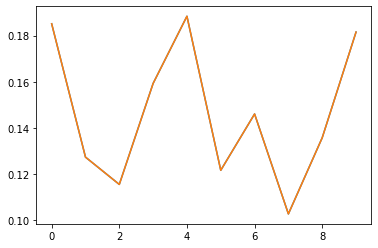

In [12]:
# AlexNet example   


# transforms
train_transform = transforms.Compose([
    transforms.RandomRotation(10),      
    transforms.RandomHorizontalFlip(),  
    transforms.Resize(224),             
    transforms.CenterCrop(224),         
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])
        


# training params
batch_size = 100
epochs = 10
lr = .001
max_test_batches = 2
# fp to save to
model_fp = './models/cats_dogs-CNN-AlexNet.pt'

# data
root = './data/CATS_DOGS/'
train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)
# data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


print(
    f"class names: {train_data.classes}",
    f"train images: {len(train_data)}",
    f"test images: {len(test_data)}",
    sep='\n'    
)


# use saved model or create new one
try:
    model = models.alexnet(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.classifier = torch.nn.Sequential(
        torch.nn.Linear(9216, 1024),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.4),
        torch.nn.Linear(1024, 2),
        torch.nn.LogSoftmax(dim=1))
    model.load_state_dict(torch.load(model_fp))
    print('USING MODEL WITH LOADED SAVE STATE')
except Exception as e: 
    print(e)
    model = models.alexnet(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.classifier = torch.nn.Sequential(
        torch.nn.Linear(9216, 1024),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.4),
        torch.nn.Linear(1024, 2),
        torch.nn.LogSoftmax(dim=1))
    print('USING NEW MODEL')
    
print(model)

# loss / optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

'''
# train
for i in range(epochs):
    for b, (batch_X, batch_y) in enumerate(train_loader):
        # predict
        y_pred = model.forward(batch_X)
        # loss
        loss = criterion(y_pred, batch_y)       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        if (b % 100 == 0):
            print(f"epoch: {i}, batch: {b}, loss: {loss.item():.2f}")
'''


# train
losses = []
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(train_loader))    
    # training prediction
    y_pred = model.forward(batch_X)
    # loss / optimization
    loss = criterion(y_pred, batch_y) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 1 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
        losses.append(loss.item())


# clear output
    # clear loss/epoch logs
time.sleep(2)
clear_output()

# training loss (plot)
sns.lineplot(x=range(len(losses)), y=losses)

# test
y_pred_all_batches = torch.FloatTensor()
y_test_all_batches = torch.LongTensor()
with torch.no_grad():
    for b, (batch_X, batch_y) in enumerate(test_loader):
        y_pred = model.forward(batch_X)
        # append batch predictions
        y_pred_all_batches = torch.cat(tensors=(y_pred_all_batches, y_pred), dim=0)
        y_test_all_batches = torch.cat(tensors=(y_test_all_batches, batch_y), dim=0)
    
        # break early 
        if b == max_test_batches: 
            break
        
loss = criterion(y_pred, batch_y)  
print(f"loss: {loss:.4f}")


# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred_all_batches.argmax(dim=1).flatten()
df_results['y_test'] = y_test_all_batches.flatten()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']

# print(df_results[ df_results['y_test'] == 1].head(10))
# print(y_pred_all_batches[:10])

# loss plot
sns.lineplot(x=range(len(losses)), y=losses)

# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)
 
torch.save(model.state_dict(), model_fp) 




loss: 1.0012
accuracy: 0.97

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.98      0.96      0.97        49

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100


[[50  1]
 [ 2 47]]


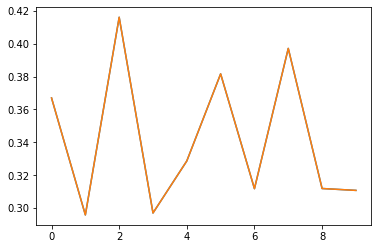

In [28]:
# ResNet example
    
# uses 'self.fc' not 'self.classifier' as last layer
    # https://discuss.pytorch.org/t/element-0-of-tensors-does-not-require-grad-and-does-not-have-a-grad-fn/32908/3

# transforms
train_transform = transforms.Compose([
    transforms.RandomRotation(10),      
    transforms.RandomHorizontalFlip(),  
    transforms.Resize(224),             
    transforms.CenterCrop(224),         
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])
        


# training params
batch_size = 50
epochs = 10
lr = .001
max_test_batches = 2
# fp to save to
model_fp = './models/cats_dogs-CNN-ResNet.pt'

# data
root = './data/CATS_DOGS/'
train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)
# data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


print(
    f"class names: {train_data.classes}",
    f"train images: {len(train_data)}",
    f"test images: {len(test_data)}",
    sep='\n'    
)


# use saved model or create new one
try:
    model = models.resnet18(pretrained=True)
    # avgpool can cause errors (not sure if this is necessary?)
    model.avgpool = nn.AdaptiveAvgPool2d(1)
    for param in model.parameters():
        param.requires_grad = False
    model.fc = torch.nn.Linear(512, 2)
    model.load_state_dict(torch.load(model_fp))
    print('USING MODEL WITH LOADED SAVE STATE')
except Exception as e: 
    print(e)
    model = models.resnet18(pretrained=True)
    # avgpool can cause errors (not sure if this is necessary?)
    model.avgpool = nn.AdaptiveAvgPool2d(1)
    for param in model.parameters():
        param.requires_grad = False
    model.fc = torch.nn.Linear(512, 2)
    print('USING NEW MODEL')
    
print(model)

# loss / optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

'''
# train
for i in range(epochs):
    for b, (batch_X, batch_y) in enumerate(train_loader):
        # predict
        y_pred = model.forward(batch_X)
        # loss
        loss = criterion(y_pred, batch_y)       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        if (b % 100 == 0):
            print(f"epoch: {i}, batch: {b}, loss: {loss.item():.2f}")
'''


# train
losses = []
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(train_loader))    
    # training prediction
    y_pred = model.forward(batch_X)
    # loss / optimization
    loss = criterion(y_pred, batch_y) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 1 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
        losses.append(loss.item())


# clear output
    # clear loss/epoch logs
time.sleep(2)
clear_output()

# training loss (plot)
sns.lineplot(x=range(len(losses)), y=losses)

# test
y_pred_all_batches = torch.FloatTensor()
y_test_all_batches = torch.LongTensor()
with torch.no_grad():
    for b, (batch_X, batch_y) in enumerate(test_loader):
        # break early?
        if b == max_test_batches: break
        # test
        y_pred = model.forward(batch_X)
        # append batch predictions
        y_pred_all_batches = torch.cat(tensors=(y_pred_all_batches, y_pred), dim=0)
        y_test_all_batches = torch.cat(tensors=(y_test_all_batches, batch_y), dim=0)
    
        
        
loss = criterion(y_pred, batch_y)  
print(f"loss: {loss:.4f}")


# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred_all_batches.argmax(dim=1).flatten()
df_results['y_test'] = y_test_all_batches.flatten()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']

# print(df_results[ df_results['y_test'] == 1].head(10))
# print(y_pred_all_batches[:10])

# loss plot
sns.lineplot(x=range(len(losses)), y=losses)

# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)
 
torch.save(model.state_dict(), model_fp) 




loss: 0.5345
accuracy: 0.9171

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       980
           1       0.98      0.97      0.98      1135
           2       0.94      0.90      0.92      1032
           3       0.92      0.91      0.91      1010
           4       0.90      0.91      0.91       982
           5       0.92      0.87      0.90       892
           6       0.93      0.94      0.93       958
           7       0.88      0.93      0.90      1028
           8       0.91      0.87      0.89       974
           9       0.87      0.88      0.88      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


[[ 969    0    0    3    0    1    3    2    2    0]
 [   0 1101    3    3    2    1    5    2   18    0]
 [  10    0  925   12   16    0   18   23   24    4]
 [   3    1   17  916    0   26    1   20   20    

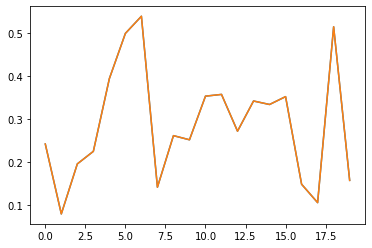

In [4]:
# CUDA

# CNN (mnist)

use_cuda = torch.cuda.is_available()

# Conv2d -- https://pytorch.org/docs/stable/nn.html#conv2d
    # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride)
    # conv1 = torch.nn.Conv2d(1,6,3,1)
    # conv2 = torch.nn.Conv2d(6,16,3,1)
# pooling
    # F.max_pool2d(x, kernel_size, stride, padding)
# nn
    # x = F.relu(conv1(x))
    # x = F.max_pool2d(x, 2, 2)
    # x = F.relu(conv2(x))
    # x = F.max_pool2d(x, 2, 2)

# transform data to tensor
to_tensor = transforms.ToTensor()
# import dataset using torchvision
    # each record is tuple (image, label)
    # image.shape -- 1x28x28
# image count
    # train -- 60k
    # test -- 10k
train_data = datasets.MNIST(
    root='./data/',
    train=True,
    download=True,
    transform=to_tensor
)
test_data = datasets.MNIST(
    root='./data/',
    train=False,
    download=True,
    transform=to_tensor
)

# model
class Model(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1,6,3,1)
        self.conv2 = torch.nn.Conv2d(6,16,3,1)
        self.fc1 = torch.nn.Linear(5*5*16, layers[0])
        self.fc2 = torch.nn.Linear(layers[0], layers[1])
        self.fc3 = torch.nn.Linear(layers[1], layers[2])
        
    def forward(self,X):
        # conv / pool layers
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        # prepare for fc layers
        X = X.view(-1, 16*5*5) # flatten
        # fc layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1)
        return X
        

# params
epochs = 2000
layers = [120,84,10] # fully connected (input / hidden / output dimensions)
batch_size = 20
lr = .001
model_fp = './models/mnist-image-CNN.pt'
    
# data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# use saved model or create new one
try:
    model = Model(layers=layers)
    model.load_state_dict(torch.load(model_fp))
    print('USING MODEL WITH LOADED SAVE STATE')
except Exception as e: 
    print(e)
    model = Model(layers=layers)
    print('USING NEW MODEL')
    
if use_cuda:
    model = model.cuda()
    
print(model)

# loss / optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

'''
# train
for i in range(epochs):
    for b, (batch_X, batch_y) in enumerate(train_loader):
        # predict
        y_pred = model.forward(batch_X)
        # loss
        loss = criterion(y_pred, batch_y)       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        if (b % 100 == 0):
            print(f"epoch: {i}, batch: {b}, loss: {loss.item():.2f}")
'''

# train
losses = []
for i in range(epochs):
    # load data
    batch_X, batch_y = next(iter(train_loader))
    if use_cuda:
        batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
    # training prediction
        # view -- resize to batch_size x flattened_image
    y_pred = model.forward(batch_X)
    # loss/error
        # y_pred is a 1d tensor of probabilities (length: number of classes)
        # take the argmax to get the index of the highest
    loss = criterion(y_pred, batch_y) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i % 100 == 0):
        print(f"epoch: {i}, loss: {loss.item():.2f}")
        losses.append(loss.item())


# clear output
    # clear loss/epoch logs
time.sleep(3)
clear_output()

# training loss (plot)
sns.lineplot(x=range(len(losses)), y=losses)

# test
y_pred_all_batches = torch.FloatTensor()
y_test_all_batches = torch.LongTensor()
if use_cuda:
    y_pred_all_batches, y_test_all_batches = y_pred_all_batches.cuda(), y_test_all_batches.cuda()
with torch.no_grad():
    for b, (batch_X, batch_y) in enumerate(test_loader):
        if use_cuda:
            batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
        y_pred = model.forward(batch_X)
        # append batch predictions
        y_pred_all_batches = torch.cat(tensors=(y_pred_all_batches, y_pred), dim=0)
        y_test_all_batches = torch.cat(tensors=(y_test_all_batches, batch_y), dim=0)
loss = criterion(y_pred, batch_y)  
print(f"loss: {loss:.4f}")

# evaluate
df_results = pd.DataFrame()
df_results['y_pred'] = y_pred_all_batches.argmax(dim=1).flatten().cpu()
df_results['y_test'] = y_test_all_batches.flatten().cpu()
df_results['correct'] = df_results['y_pred'] == df_results['y_test']

# loss plot
sns.lineplot(x=range(len(losses)), y=losses)

# score
print(
    f"accuracy: {metrics.accuracy_score(df_results['y_test'], df_results['y_pred'])}",
    metrics.classification_report(df_results['y_test'], df_results['y_pred']),
    metrics.confusion_matrix(df_results['y_test'], df_results['y_pred']),
    sep='\n\n'
)
 
torch.save(model.state_dict(), model_fp) 
